In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets For Machine Learning/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [146]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [147]:
from sklearn.preprocessing import OrdinalEncoder #OrdinalEncoder is used for ordered categorical values

In [148]:
enc = OrdinalEncoder() # no rank is needed here
df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom']])
df['basement'] = enc.fit_transform(df[['basement']])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])

In [149]:
df.head() # furnishingstatus is still not encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [150]:
#now we will utilize OrdinalEncoder for furnishingstatus
rank = ['unfurnished','semi-furnished','furnished'] # rank or serial is defined. If rank is not defined, then the encoding will happen randomly.
oe = OrdinalEncoder(categories=[rank]) # will encode according to the rank
df['furnishingstatus'] = oe.fit_transform(df[['furnishingstatus']])

In [151]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


In [152]:
import matplotlib.pyplot as plt  # importing necessary libraries for plotting
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='price', ylabel='Density'>

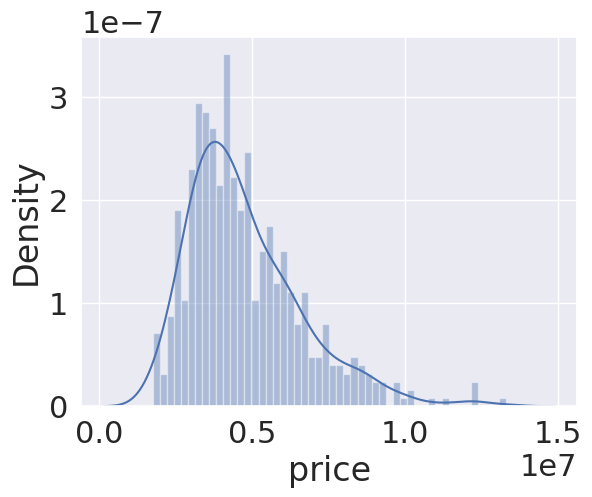

In [153]:
sns.distplot(df['price'],bins=50) #randomly watching a distribution

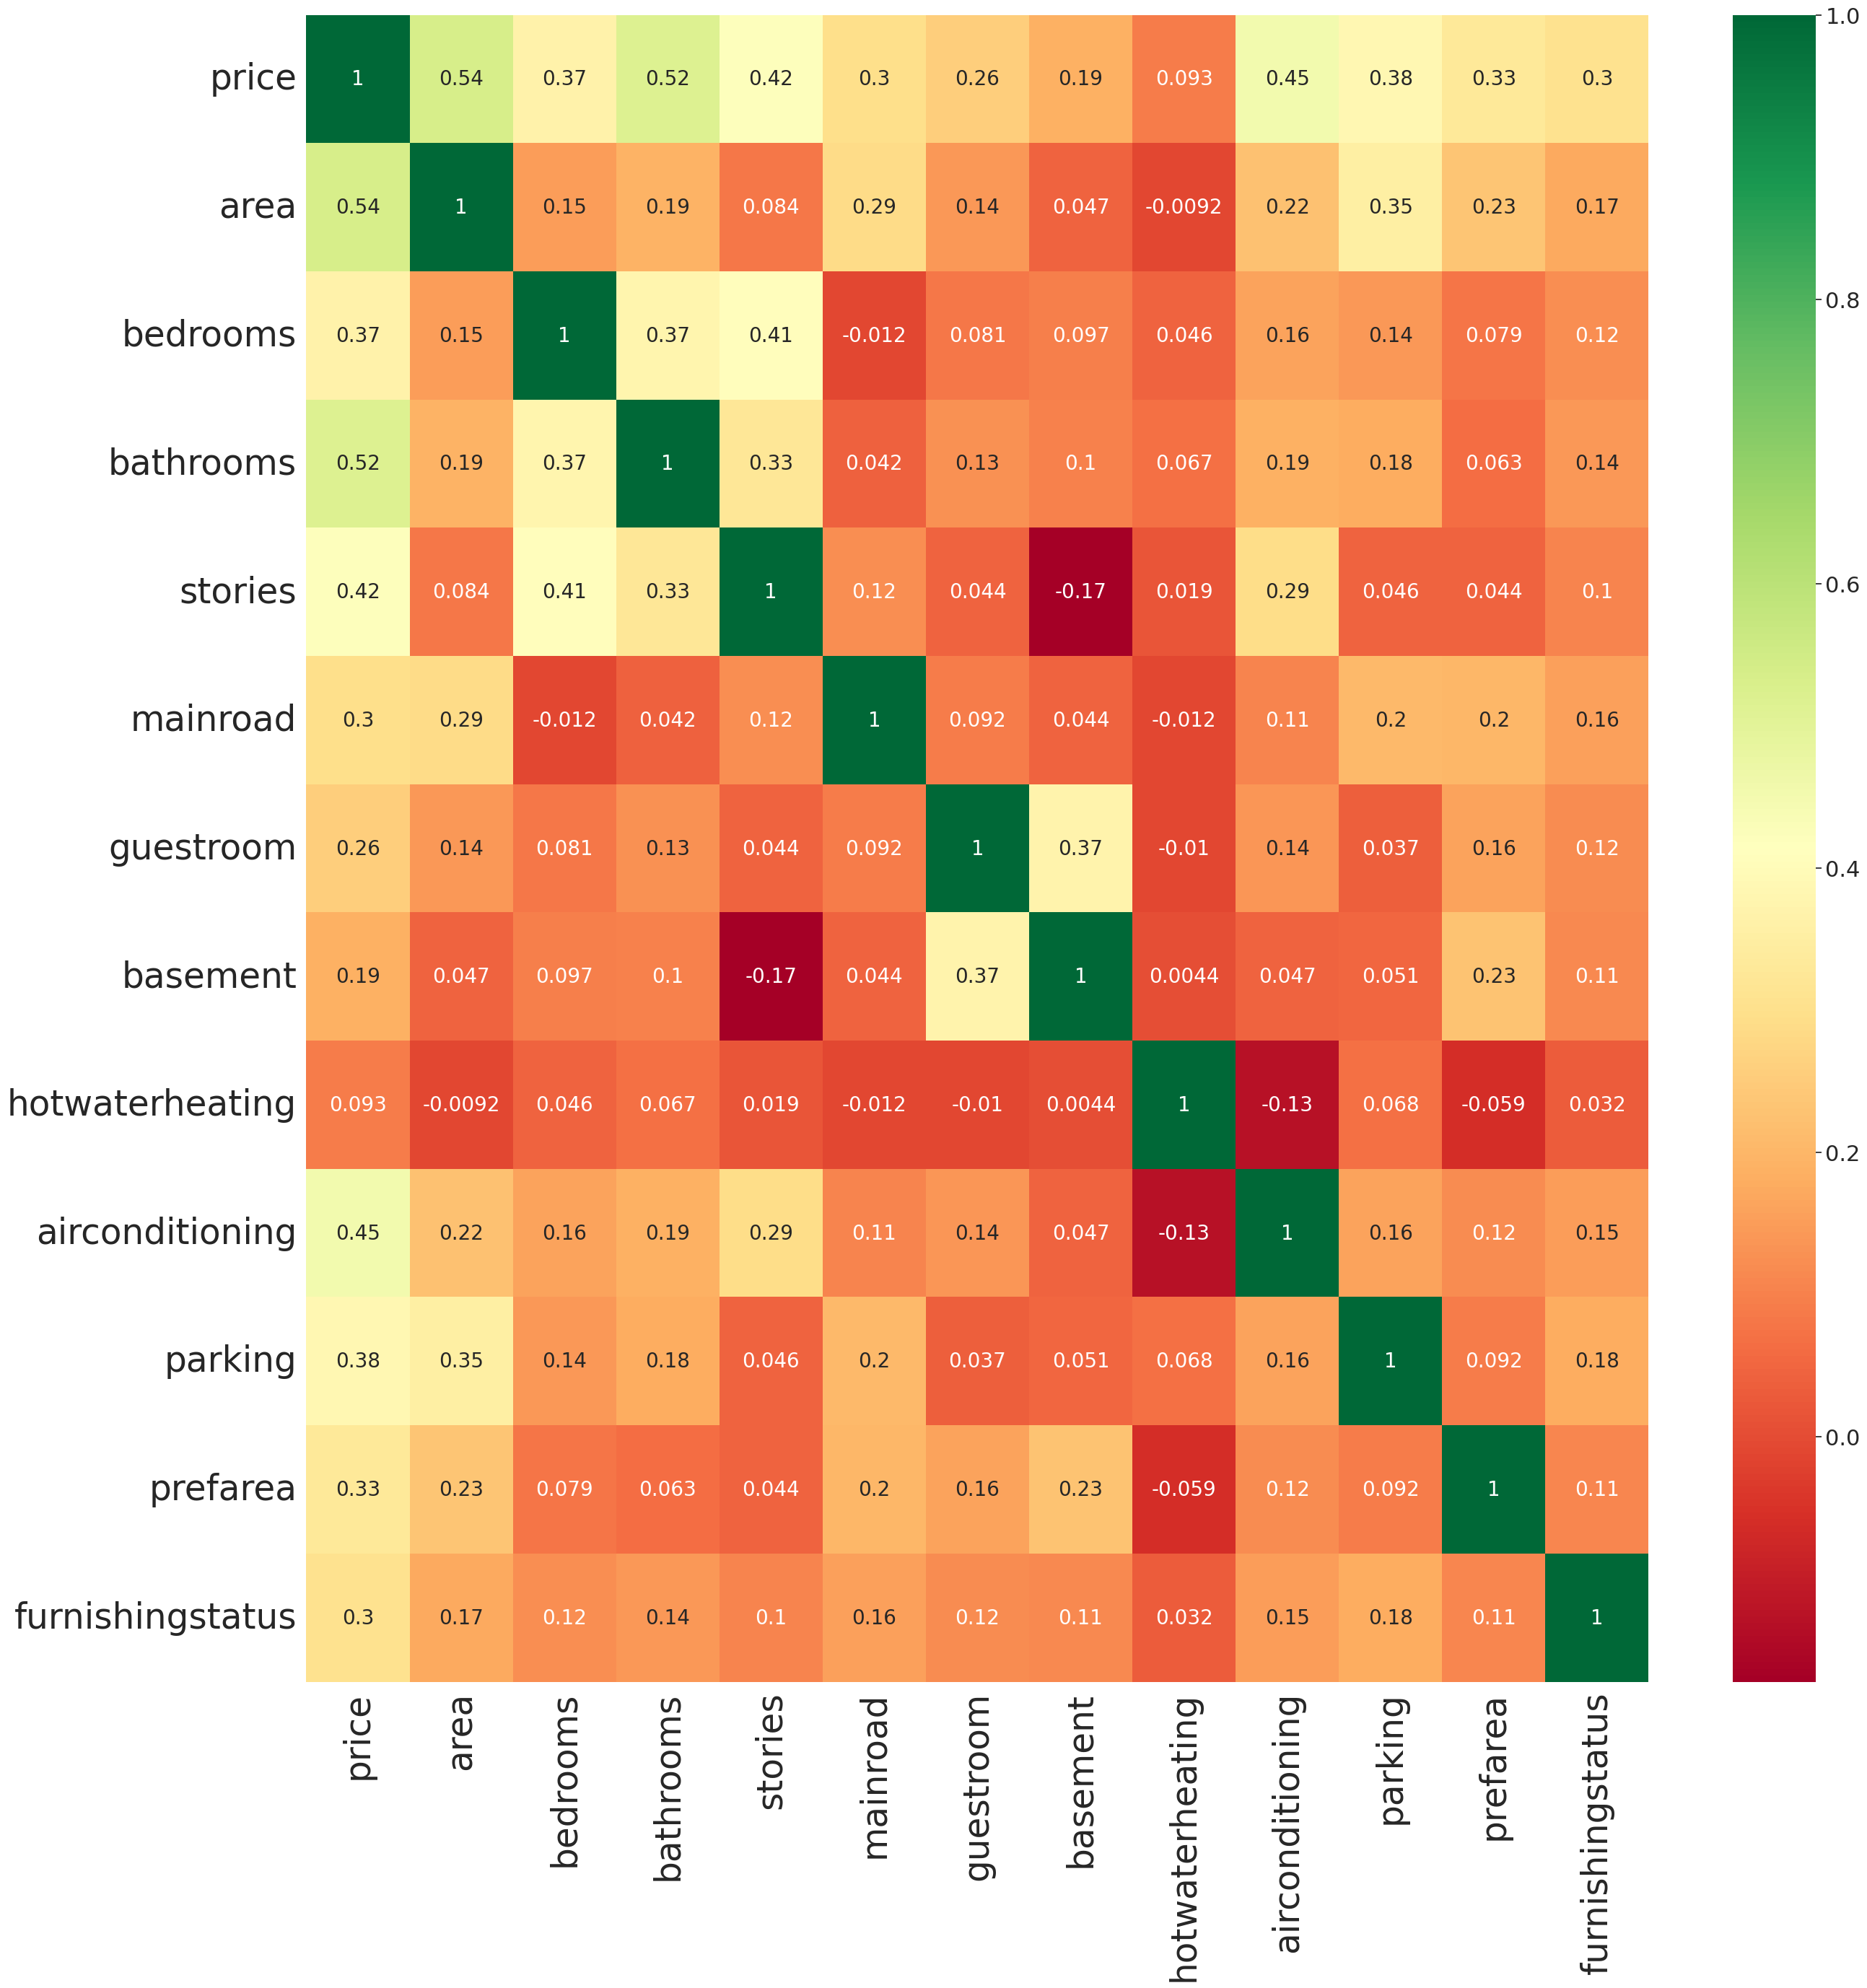

In [154]:
# correlation matrix  / heatmap
sns.set(font_scale=2)
plt.subplots(figsize=(30,30))
heat_plot = sns.heatmap(df.corr(method='pearson'),annot=True,cmap='RdYlGn',annot_kws={'size':20})
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.show()

In [155]:
# we can drop hotwaterheating

x = df.drop(['price'],axis=1) #feature
y = df['price'] #target

In [156]:
print(x.shape)
print(y.shape)

(545, 12)
(545,)


In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [158]:
from sklearn.preprocessing  import MinMaxScaler
mmc = MinMaxScaler()
x_train = mmc.fit_transform(x_train)
x_test = mmc.fit_transform(x_test)

In [159]:
x_train

array([[0.29896907, 0.4       , 0.33333333, ..., 0.33333333, 0.        ,
        1.        ],
       [0.3814433 , 0.4       , 0.33333333, ..., 1.        , 0.        ,
        0.5       ],
       [0.14886598, 0.2       , 0.        , ..., 0.66666667, 0.        ,
        1.        ],
       ...,
       [0.19587629, 0.4       , 0.33333333, ..., 0.33333333, 0.        ,
        1.        ],
       [0.16426117, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26460481, 0.4       , 0.33333333, ..., 0.33333333, 0.        ,
        0.5       ]])

In [160]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # fit_intercept, copy_x, n_jobs

y = Wx + b;
same as y = mx + c
W is weight(slope)
b is bias(intercept term / constant)

In [161]:
reg.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred = reg.predict(x_test) # predicting value
y_pred

array([ 6029364.42476201,  8067824.45895751,  3118831.46433531,
        4728026.66447905,  3436314.07249681,  3839103.74703785,
        6034081.53284037,  7182730.79551024,  2761793.45904681,
        2693505.92069634, 11112468.85262696,  2876803.94947864,
        3231672.74327579,  3401851.73272715,  3817886.77882026,
        6480945.38272576,  2916318.6945186 ,  5041786.02796789,
        4604635.23223068,  3703695.40119218,  5965945.53533485,
        6122591.64642047,  2791759.95866017,  4855963.7247457 ,
        5576482.13667379,  8542790.29213908,  3251260.92102124,
        5828055.71146127,  8859877.98610466,  3425115.78057427,
        7098364.03548862,  3396843.5414542 ,  7521869.57984609,
        4424392.03315496,  3795896.4614733 ,  6480099.09056362,
        4914662.06889299,  4498658.87087891,  3291014.23832027,
        5269147.46128353,  4876997.85266996,  3571640.9385677 ,
        8043952.46153478,  4139909.74320416,  3927495.37703027,
        4470289.37989716,  7484548.86041

In [163]:
y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [164]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error #importing functions
import math

In [165]:
R2 = r2_score(y_test,y_pred)
R2

0.6233608143552076

In [166]:
MSE = mean_squared_error(y_test,y_pred)
MSE

1903749221373.3274

In [167]:
RMSE = math.sqrt(MSE) #root
RMSE

1379764.1904953641

In [168]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

1057675.1454856389

**Error is too high. So we can't fit the data with a linear relationship.**

Where is accuracy? Well, accuracy is for classification.